We will take a look at sentiment analysis task with Naive Bayes classifier.

---

This consists of 3 parts:


*   Data exploration
*   Sentiment classification
*   Report


You can use the following references:

* https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-naive-bayes
* https://www.enjoyalgorithms.com/blog/text-data-pre-processing-techniques-in-ml
* https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
* For precision, recall, f1 refer to https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics

To access dataset:

Option 1: upload data to your Google Drive, then mount the drive

Option 2: upload directly to colab


In [ ]:
# To mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First let's import all neccessary for this assignment modules.

In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import scattertext as st
import spacy
import seaborn as sns # self as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics

Now, pick a dataset for the analysis from the following:


*   Financial dataset (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis)
*   Movie review (https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data)
* Amazon Kindle Book Review (https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis) - use 'preprocessed_kindle_review.csv and convert rating into sentiment: 1-2: negative, 3: neutral, 4-5: positive
* Steam Reviews (https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews) use train.csv and treat 'user_suggestion' as a Sentiment 1-positive, 0-negative

Download it from kaggle.com and upload to this colab: left menu 'Files'-> 'Upload file'

**Make sure that your file is fully uploaded before proceeding**


# Data Exploration

In [ ]:
# Use pd.read_csv to upload dataset [~ 1 line].
# You can use 'usecols' argument to specify which columns to load


# Your code here:
# dataset = pd.read_csv("/content/drive/MyDrive/data/data.csv")

dataset = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
# You can take a look at first 5 entries with the following
dataset.head(20)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
# If you don't have an explicit 'sentiment' column, 
# identify which can be used as a proxy and create a 'sentiment' column based on
# the proxy column. 


# Your code here:
# Hint: use '.map' method

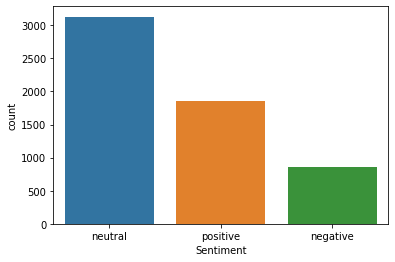

In [ ]:
# Now let's take a look at the distribution of labels (i.e. sentiment values)
# across the dataset.

# Display a bar plot based on value counts of the 'sentiment' column [~ 1 line] 

# Your code here:
# dataset['Sentiment'] = dataset['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0}, na_action=None)
count = sns.countplot(data= dataset, x= 'Sentiment', order= dataset['Sentiment'].value_counts().index)
plt.show()

# dataset.head()


**Answer this question in your report:**

What problem we see with the dataset, if any?

If there is a problem, how it can impact classification?

In [ ]:
# Let's create a separate numerical column 'label', 
# which will be used by our classifier.

# Create a new column 'label' based on values in the 'sentiment' column.
# It is up to you what number to assign to each category. [~ 1 line]
# For example, if there are 3 categories ("positive", "negative", "neutral"),
# I would use something like:
# 
# >>> df[<your sentiment column>].map({"positive":2, "negative":1, "neutral":0})


# Your code here:
dataset['label'] = dataset['Sentiment'].map({"positive":2, "negative":1, "neutral":0}, na_action=None)
# dataset.head()

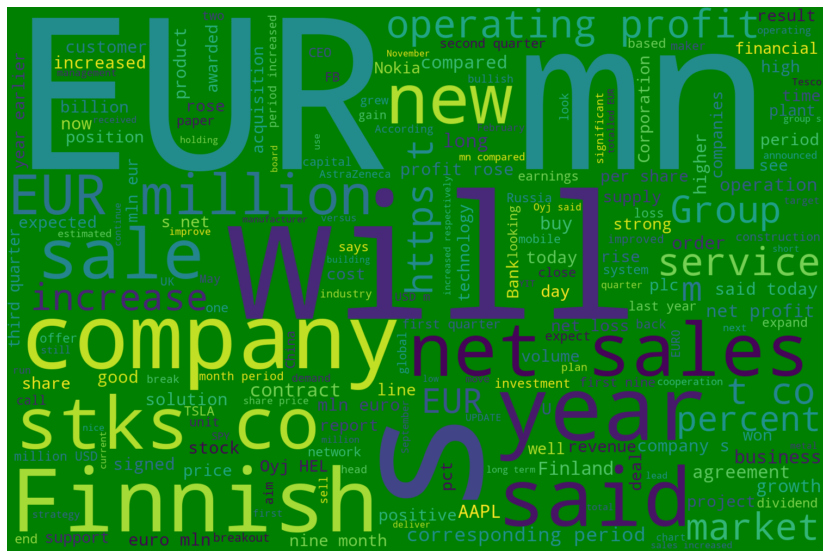

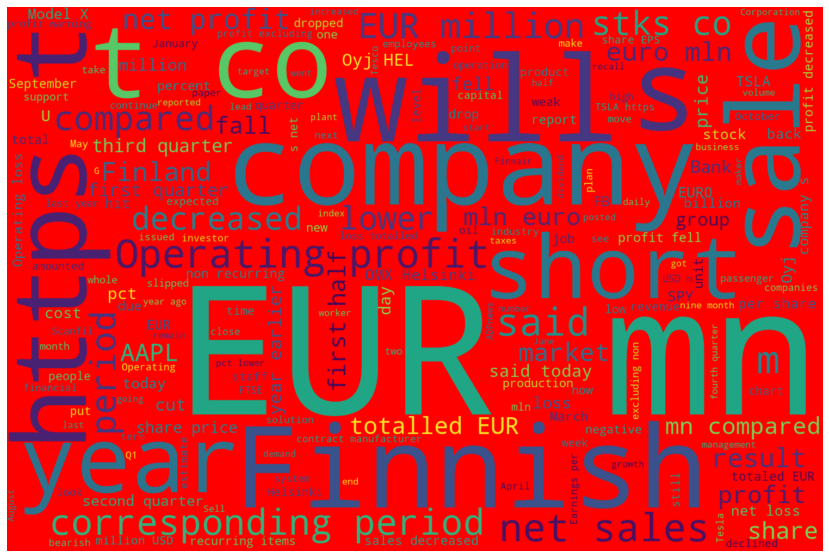

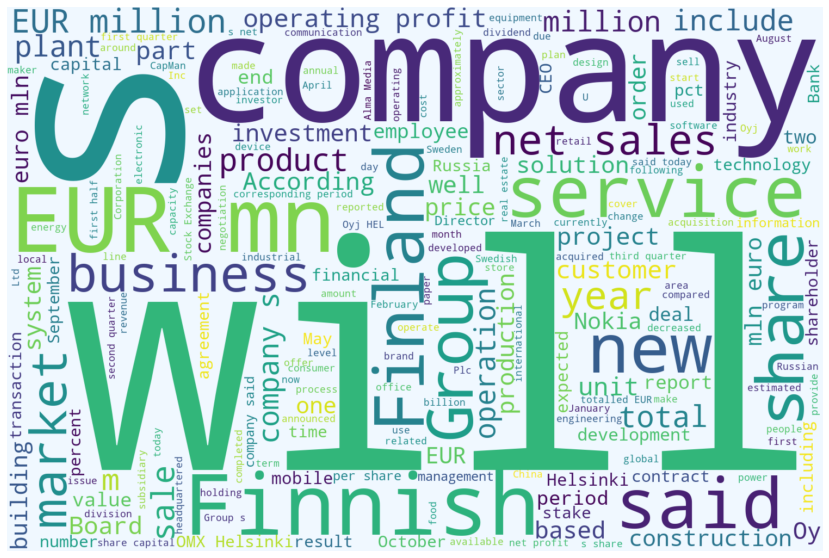

In [ ]:
# To further get a notion of our dataset, let's display 
# a word cloud for each sentiment category, present in your dataset. [~ 7 lines per category]

# You are free to use the following code as a general guide.

# First let's extract only positive sentences
# >>> positive = dataset[dataset[<sentiment column>] == "positive"]
# Now let's write all positive entries into one variable
# >>> text = "".join([i for i in positive[<sentence column>]])
# The following creates a WordCloud instance
# >>> wordcloud = WordCloud(background_color="grey").generate(text)
# Finally, let's display our word cloud
# >>> plt.figure(figsize=(15,10))
# >>> plt.imshow(wordcloud, interpolation='bilinear')
# >>> plt.axis("off")
# >>> plt.show()

# Your code here:
positive = dataset[dataset['Sentiment'] == "positive"]
wordcloud = WordCloud(background_color="green", width=1500, height=1000).generate("".join([i for i in positive['Sentence']]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

negative = dataset[dataset['Sentiment'] == "negative"]
wordcloud = WordCloud(background_color="red", width=1500, height=1000).generate("".join([i for i in negative['Sentence']]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

neutral = dataset[dataset['Sentiment'] == "neutral"]
wordcloud = WordCloud(background_color="aliceblue", width=1500, height=1000).generate("".join([i for i in neutral['Sentence']]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# For a more interactive exploration of your dataset, 
# we will use 'scattertext' library, imported as st

# Adjust the following code to work with your dataset
# Leave this line as is
nlp = spacy.load('en_core_web_sm')

# Now let's remove stopwords
nltk.download('stopwords')
stpwrds = stopwords.words('english')

# Let's exclude neutral sentences, if there are any
# Use the following example as a reference:
# >>> ds = dataset[dataset["sentiment"] != "neutral"].copy()

ds = dataset.loc[dataset['Sentiment'] !='neutral'].copy()  # added .loc

# The following code puts your sentences into lower case and removes stopwords
# Change '<Your Sentences Column>' to the name of the column with sentences.
ds['Sentence'] = ds['Sentence'].apply(
    lambda words: ' '.join(
        str(word).lower() for word in words.split() 
        if str(word).lower() not in stpwrds)
    )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Let's create a corpus for the following plot.
# It is possible, that this will take a long time, 
# when the whole ds is provided. In this case, pick a slice of your dataset,
# i.e. ds[:1000], or ds[2000:3500], etc.
corpus = st.CorpusFromPandas(ds[:], # added .iloc
                             category_col= 'Sentiment' , # provide the name of your sentiment column here #  parsed_col= 'Sentence'
                             text_col= 'Sentence' , # provide the name of your sentences' column here
                              nlp=nlp
                             ).build()



print(ds[0:30])

                                             Sentence Sentiment  label
0   geosolutions technology leverage benefon 's gp...  positive      2
1          $esi lows, $1.50 $2.50 bk real possibility  negative      1
2   last quarter 2010 , componenta 's net sales do...  positive      2
5                      $spy surprised see green close  positive      2
6   shell's $70 billion bg deal meets shareholder ...  negative      1
7   ssh communications security corp stock exchang...  negative      1
8   kone 's net sales rose 14 % year-on-year first...  positive      2
10  circulation revenue increased 5 % finland 4 % ...  positive      2
11  $sap q1 disappoints #software licenses down. r...  negative      1
12  subdivision made sales revenues last year eur ...  positive      2
15                                 $fb gone green day  positive      2
16  $msft sql server revenue grew double-digit sql...  positive      2
21  aviva, friends life top forecasts ahead 5.6 bi...  positive      2
25    

In [ ]:
# The following code will create an interactive plot and save it as 'my_plot.html'.
# Download it to your machine and open in a separate tab to explore.
# Include a screenshot in your report. 
html = st.produce_scattertext_explorer(
    corpus,
    category="negative",
    not_category_name="positive",
    # width_in_pixels=1000,
    transform=st.Scalers.log_scale_standardize)

open('./my_plot.html', 'wb').write(html.encode('utf-8'))


889285

# Sentiment classification

In [ ]:
# Let's preprocess dataset first
# First, put your sentences in a lowercase [~ 1 line]
# Suggestion: create a separate variable (e.g. corpus)
# to store sentences from the dataset


# Your code here
corpus = dataset['Sentence'].str.lower().copy()
corpus.head()

0    the geosolutions technology will leverage bene...
1    $esi on lows, down $1.50 to $2.50 bk a real po...
2    for the last quarter of 2010 , componenta 's n...
3    according to the finnish-russian chamber of co...
4    the swedish buyout firm has sold its remaining...
Name: Sentence, dtype: object

In [ ]:
# Now, let's replace hyperlinks, if any exist [~ 1line]
# Hint: regex for hyperlinks is r"http\S+"

# Your code here
corpus = corpus.str.replace(r"http\S+","",regex=True)
corpus.head(100)


0     the geosolutions technology will leverage bene...
1     $esi on lows, down $1.50 to $2.50 bk a real po...
2     for the last quarter of 2010 , componenta 's n...
3     according to the finnish-russian chamber of co...
4     the swedish buyout firm has sold its remaining...
                            ...                        
95    m-real said there are ` no grounds ' for the r...
96    lember said the matter was topical also in est...
97    - moody 's said it gave p a1 long-term senior ...
98                                         $tsla recall
99    the liquidity providing was interrupted on may...
Name: Sentence, Length: 100, dtype: object

In [ ]:
# Finally, let's remove punctuations
# Hint: regex for punctuations r"[^A-Za-z0-9]+"

# Your code here
corpus = corpus.str.replace(r"[^A-Za-z0-9]+"," ",regex=True)
corpus.head(100)
# print(corpus['Sentence'])


0     the geosolutions technology will leverage bene...
1      esi on lows down 1 50 to 2 50 bk a real possi...
2     for the last quarter of 2010 componenta s net ...
3     according to the finnish russian chamber of co...
4     the swedish buyout firm has sold its remaining...
                            ...                        
95    m real said there are no grounds for the rumor...
96    lember said the matter was topical also in est...
97     moody s said it gave p a1 long term senior un...
98                                          tsla recall
99    the liquidity providing was interrupted on may...
Name: Sentence, Length: 100, dtype: object

In [ ]:
# Now let's remove stopwords
nltk.download('stopwords')
stpwrds = stopwords.words('english')
# dataset = dataset['Sentence'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
# corpus.head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove stopwords from the text [~ 1 line]

# Your code here:

corpus = corpus.apply(
    lambda words: ' '.join(
        word.lower() for word in words.split() 
        if word.lower() not in stpwrds)
    )

corpus.head(20)


0     geosolutions technology leverage benefon gps s...
1                esi lows 1 50 2 50 bk real possibility
2     last quarter 2010 componenta net sales doubled...
3     according finnish russian chamber commerce maj...
4     swedish buyout firm sold remaining 22 4 percen...
5                         spy surprised see green close
6     shell 70 billion bg deal meets shareholder ske...
7     ssh communications security corp stock exchang...
8     kone net sales rose 14 year year first nine mo...
9     stockmann department store total floor space 8...
10    circulation revenue increased 5 finland 4 swed...
11    sap q1 disappoints software licenses real prob...
12    subdivision made sales revenues last year eur ...
13                        viking line canceled services
14    ahlstrom corporation stock exchange announceme...
15                                    fb gone green day
16    msft sql server revenue grew double digit sql ...
17    according l nnen tehtaat ceo matti karppin

In [ ]:
# Lemmatization
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
# Create an instance of a WhitespaceTokenizer [1 line],
# and WordNetLemmatizer [1 line]

# Perform lemmatization on your sentences,
# for example, if my sentence array is stored 
# in a corpus variable, I would use the following code:
# >>> corpus = corpus.apply(
# >>>    lambda words: ' '.join(
# >>>        lemmatizer.lemmatize(word) for word in tokenizer.tokenize(words)
# >>>        )
# >>>    )

# Your code here:

corpus = corpus.apply(
    lambda words: ' '.join(
    lemmatizer.lemmatize(word) for word in tokenizer.tokenize(words)
        )
    )

corpus.head(20)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0     geosolutions technology leverage benefon gps s...
1                 esi low 1 50 2 50 bk real possibility
2     last quarter 2010 componenta net sale doubled ...
3     according finnish russian chamber commerce maj...
4     swedish buyout firm sold remaining 22 4 percen...
5                         spy surprised see green close
6     shell 70 billion bg deal meet shareholder skep...
7     ssh communication security corp stock exchange...
8     kone net sale rose 14 year year first nine mon...
9     stockmann department store total floor space 8...
10    circulation revenue increased 5 finland 4 swed...
11    sap q1 disappoints software license real probl...
12    subdivision made sale revenue last year eur 48...
13                         viking line canceled service
14    ahlstrom corporation stock exchange announceme...
15                                    fb gone green day
16    msft sql server revenue grew double digit sql ...
17    according l nnen tehtaat ceo matti karppin

In [ ]:
####### **** Approach 2 ***** ########

## Added more granularity 

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

corpus2 = corpus.apply(lemmatize_text).copy()

corpus2.head()

0    [geosolutions, technology, leverage, benefon, ...
1      [esi, low, 1, 50, 2, 50, bk, real, possibility]
2    [last, quarter, 2010, componenta, net, sale, d...
3    [according, finnish, russian, chamber, commerc...
4    [swedish, buyout, firm, sold, remaining, 22, 4...
Name: Sentence, dtype: object

In [ ]:
# Create an instance of a CountVectorizer [1 line]
# and encode your sentences [~ 1 line]
# hint: look into fit_transform

# Your code here:
CountVector = CountVectorizer(stop_words='english')
processed_corpus = CountVector.fit_transform(corpus)

In [ ]:
####### **** Approach 2 ***** ########

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', lowercase=False)

bag_of_words = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False).fit_transform(corpus2)

In [ ]:
# Create a separate variable, which holds a numpy array of labels [1 line]
# Hint: use to_numpy()

# Your code here:
numpy_labels = dataset['label'].to_numpy()

print(numpy_labels)

[2 1 2 ... 0 0 2]


In [ ]:
# Create a train and test dataset with 'train_test_split' [1 line]

# Your code here:
x_train, x_test, y_train, y_test = train_test_split(processed_corpus, numpy_labels, stratify=numpy_labels, test_size=0.2, random_state=24)

In [ ]:
####### **** Approach 2 ***** ########

x2_train, x2_test, y2_train, y2_test = train_test_split(bag_of_words, numpy_labels, stratify=numpy_labels, test_size=0.2, random_state=24)

In [ ]:
# Create an instance of a MultinomialNB model [1 line]
# and fit it with a training data [1 line]

# Your code here:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
####### **** Approach 2 ***** ########

model_mnb2 = MultinomialNB()
model_mnb2.fit(x2_train, y2_train)

MultinomialNB()

In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 
model_mnb.score(x_test, y_test)

0.6757912745936698

In [ ]:
####### **** Approach 2 ***** ########

model_mnb2.score(x2_test, y2_test)

0.6655260906757913

In [ ]:
# Create an instance of a ComplementNB model [1 line]
# and fit it with a training data [1 line] 

# Your code here:
model_cmp = ComplementNB()
model_cmp.fit(x_train, y_train)

ComplementNB()

In [ ]:
####### **** Approach 2 ***** ########

model_cmp2 = ComplementNB()
model_cmp2.fit(x2_train, y2_train)

ComplementNB()

In [ ]:
# Evaluate your model on a test dataset [~ 1 line]
# Hint: display the accuracy, achieved on a test data

# Your code here 
model_mnb.score(x_test, y_test)

0.6757912745936698

In [ ]:
model_cmp.score(x_test, y_test)

0.6526946107784432

In [ ]:
####### **** Approach 2 ***** ########

model_mnb2.score(x2_test, y2_test)

0.6655260906757913

In [ ]:
####### **** Approach 2 ***** ########

model_cmp2.score(x2_test, y2_test)

0.6578272027373824

In [ ]:
# For both models calculate precision, recall and F1 scores [~ 8 lines]

# Your code here:
predictions_mnb = model_mnb.predict(x_test)
predictions_cmp = model_cmp.predict(x_test)

In [ ]:
####### **** Approach 2 ***** ########

predictions_mnb2 = model_mnb2.predict(x2_test)
predictions_cmp2 = model_cmp2.predict(x2_test)

In [ ]:
from nltk.metrics.scores import recall
# For both models display confusion matrix [~ 6 lines]
# Hint: metrics.confusion_matrix can be used to calculate the matrix
# and metrics.ConfusionMatrixDisplay can be used for plotting

# Your code here:
precision_mnb = metrics.precision_score(predictions_mnb, y_test, average=None)
recall_mnb = metrics.recall_score(predictions_mnb, y_test, average=None)
f1_mnb = metrics.f1_score(predictions_mnb, y_test, average=None)
print("Multinominal precision = {}, recall = {}, f1 = {}".format(precision_mnb, recall_mnb, f1_mnb))

precision_cmp = metrics.precision_score(predictions_cmp, y_test, average=None)
recall_cmp = metrics.recall_score(predictions_cmp, y_test, average=None)
f1_cmp = metrics.f1_score(predictions_cmp, y_test, average=None)
print("Complement precision = {}, recall = {}, f1 = {}".format(precision_cmp, recall_cmp, f1_cmp))

Multinominal precision = [0.75239617 0.41860465 0.66576819], recall = [0.7370892  0.42105263 0.68802228], f1 = [0.74466403 0.41982507 0.67671233]
Complement precision = [0.68051118 0.52325581 0.66576819], recall = [0.75666075 0.37190083 0.67857143], f1 = [0.71656854 0.43478261 0.67210884]


In [ ]:
####### **** Approach 2 ***** ########

from nltk.metrics.scores import recall

precision_mnb2 = metrics.precision_score(predictions_mnb2, y2_test, average=None)
recall_mnb2 = metrics.recall_score(predictions_mnb2, y2_test, average=None)
f1_mnb2 = metrics.f1_score(predictions_mnb2, y2_test, average=None)
print("Multinominal precsion = {}, recall = {}, f1 = {}".format(precision_mnb2, recall_mnb2, f1_mnb2))

precision_cmp2 = metrics.precision_score(predictions_cmp2, y2_test, average=None)
recall_cmp2 = metrics.recall_score(predictions_cmp2, y2_test, average=None)
f1_cmp2 = metrics.f1_score(predictions_cmp2, y2_test, average=None)
print("Complement precsion = {}, recall = {}, f1 = {}".format(precision_cmp2, recall_cmp2, f1_cmp2))

Multinominal precsion = [0.74440895 0.40116279 0.65498652], recall = [0.73617694 0.40828402 0.66212534], f1 = [0.74027006 0.40469208 0.65853659]
Complement precsion = [0.68370607 0.52906977 0.67385445], recall = [0.76428571 0.37603306 0.68119891], f1 = [0.72175379 0.43961353 0.67750678]


In [ ]:
cmmnb = metrics.confusion_matrix(y_test, predictions_mnb, labels=model_mnb.classes_)
cmcmp = metrics.confusion_matrix(y_test, predictions_cmp, labels=model_cmp.classes_)

In [ ]:
####### **** Approach 2 ***** ########
cmmnb2 = metrics.confusion_matrix(y2_test, predictions_mnb2, labels=model_mnb2.classes_)
cmcmp2 = metrics.confusion_matrix(y2_test, predictions_cmp2, labels=model_cmp2.classes_)

In [ ]:
dispmnb = metrics.ConfusionMatrixDisplay(confusion_matrix = cmmnb, display_labels=['neutral', 'negative', 'positive'])
dispcmp = metrics.ConfusionMatrixDisplay(confusion_matrix = cmcmp, display_labels=['neutral', 'negative', 'positive'])

In [ ]:
####### **** Approach 2 ***** ########
dispmnb2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cmmnb2, display_labels=['neutral', 'negative', 'positive'])
dispcmp2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cmcmp2, display_labels=['neutral', 'negative', 'positive'])

Text(0.5, 1.0, 'Complement NB Granular')

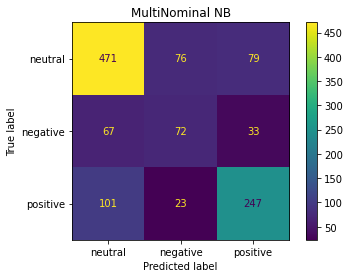

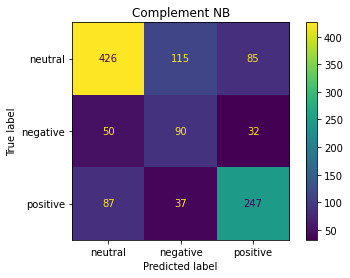

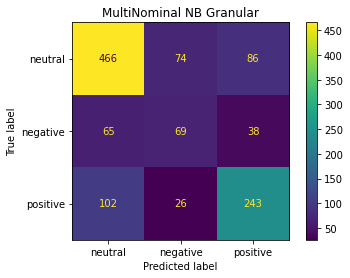

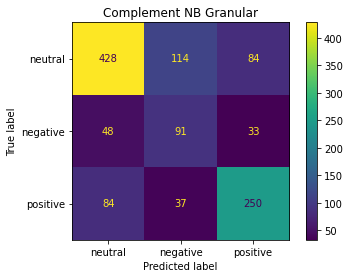

In [ ]:
dispmnb.plot()
dispmnb.ax_.set_title("MultiNominal NB")
dispcmp.plot()
dispcmp.ax_.set_title("Complement NB")

####### **** Approach 2 ***** ########
dispmnb2.plot()
dispmnb2.ax_.set_title("MultiNominal NB Granular")
dispcmp2.plot()
dispcmp2.ax_.set_title("Complement NB Granular")

# Report